<a href="https://colab.research.google.com/github/Shj-A/2022_ML_Project/blob/main/ML_Sklearn_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import csv
import copy

#CSV -> list로 전환

In [3]:
a_list = []
f = open("/content/drive/MyDrive/Colab Notebooks/2022M L sklearn/datasets-numeric-cloud.csv",'r')
rea = csv.reader(f)
for col in rea:
    a_list.append([col[0],col[1],col[3],col[4],col[5],col[6],col[2]]) # class로 사용할 계절을 맨 마지막 열로 가지는 리스트 생성
f.close()
print(a_list)

[['period', 'seeded', 'NC', 'SC', 'NWC', 'TE', 'season'], ['1', 'S', '1.65', '1.8', '3.33', '1.69', 'AUTUMN'], ['2', 'U', '1.09', '0.79', '1.59', '0.74', 'AUTUMN'], ['3', 'S', '2.39', '0.36', '2.06', '0.81', 'WINTER'], ['4', 'U', '2.96', '1.27', '4.05', '1.44', 'WINTER'], ['5', 'S', '4.16', '2.16', '6.0', '2.48', 'WINTER'], ['6', 'U', '2.76', '0.87', '4.17', '0.84', 'WINTER'], ['7', 'U', '1.08', '0.85', '3.45', '0.37', 'WINTER'], ['8', 'S', '0.26', '0.47', '0.9', '0.37', 'WINTER'], ['9', 'U', '2.53', '1.08', '3.65', '1.33', 'SPRING'], ['10', 'S', '2.76', '3.1', '5.06', '3.38', 'SPRING'], ['11', 'S', '1.07', '0.64', '1.95', '0.69', 'SPRING'], ['12', 'U', '1.42', '1.08', '1.22', '1.42', 'SPRING'], ['13', 'S', '0.24', '0.44', '0.94', '0.44', 'SPRING'], ['14', 'U', '0.7', '0.67', '0.94', '0.76', 'SPRING'], ['15', 'S', '0.97', '1.66', '2.21', '1.13', 'SUMMER'], ['16', 'U', '1.06', '1.13', '1.46', '0.88', 'SUMMER'], ['45', 'S', '0.13', '0.27', '0.35', '0.17', 'SUMMER'], ['46', 'U', '0.1', '0

#1번 Processing

##1-1 LabelEncoding

In [4]:
le = LabelEncoder() 
le.fit(['SPRING','SUMMER','AUTUMN','WINTER'])
le.classes_

array(['AUTUMN', 'SPRING', 'SUMMER', 'WINTER'], dtype='<U6')

In [5]:
item = []
for row in a_list[1:] :
    item.append(row[6]) # 각 행 마지막 열의 class 값만 추출
print(item)
item_enc = le.transform(item)
print(item_enc)

['AUTUMN', 'AUTUMN', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SUMMER', 'SUMMER', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'SUMMER', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'AUTUMN', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER',

In [6]:
a_list_enc = copy.deepcopy(a_list)
for i in range(0,108) :
    a_list_enc[i+1][6] = item_enc[i] # class value = encoding class value
print(a_list_enc[0:5])
print(a_list[0:5])

[['period', 'seeded', 'NC', 'SC', 'NWC', 'TE', 'season'], ['1', 'S', '1.65', '1.8', '3.33', '1.69', 0], ['2', 'U', '1.09', '0.79', '1.59', '0.74', 0], ['3', 'S', '2.39', '0.36', '2.06', '0.81', 3], ['4', 'U', '2.96', '1.27', '4.05', '1.44', 3]]
[['period', 'seeded', 'NC', 'SC', 'NWC', 'TE', 'season'], ['1', 'S', '1.65', '1.8', '3.33', '1.69', 'AUTUMN'], ['2', 'U', '1.09', '0.79', '1.59', '0.74', 'AUTUMN'], ['3', 'S', '2.39', '0.36', '2.06', '0.81', 'WINTER'], ['4', 'U', '2.96', '1.27', '4.05', '1.44', 'WINTER']]


Seeded 열의 2가지 문자형 속성 값 Encoding

In [7]:
le.fit(['S','U'])
le.classes_

array(['S', 'U'], dtype='<U1')

In [8]:
item = []
for row in a_list[1:] :
    item.append(row[1])
print(item)
item_enc = le.transform(item)
print(item_enc[0:5])

['S', 'U', 'S', 'U', 'S', 'U', 'U', 'S', 'U', 'S', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'U', 'U', 'S', 'S', 'U', 'U', 'S', 'U', 'S', 'S', 'U', 'U', 'S', 'U', 'S', 'U', 'S', 'S', 'U', 'S', 'U', 'U', 'S', 'S', 'U', 'U', 'S', 'S', 'U', 'U', 'S', 'U', 'S', 'U', 'S', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'U', 'U', 'S', 'S', 'U', 'U', 'S', 'S', 'U', 'U', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'S', 'U', 'S', 'U', 'U', 'S', 'S', 'U', 'S', 'U', 'U', 'S', 'S', 'U', 'S', 'U', 'U', 'S', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'U', 'S', 'U']
[0 1 0 1 0]


In [9]:
for i in range(0,108) :
    a_list_enc[i+1][1] = item_enc[i]
print(a_list_enc[0:5])
print(a_list[0:5])

[['period', 'seeded', 'NC', 'SC', 'NWC', 'TE', 'season'], ['1', 0, '1.65', '1.8', '3.33', '1.69', 0], ['2', 1, '1.09', '0.79', '1.59', '0.74', 0], ['3', 0, '2.39', '0.36', '2.06', '0.81', 3], ['4', 1, '2.96', '1.27', '4.05', '1.44', 3]]
[['period', 'seeded', 'NC', 'SC', 'NWC', 'TE', 'season'], ['1', 'S', '1.65', '1.8', '3.33', '1.69', 'AUTUMN'], ['2', 'U', '1.09', '0.79', '1.59', '0.74', 'AUTUMN'], ['3', 'S', '2.39', '0.36', '2.06', '0.81', 'WINTER'], ['4', 'U', '2.96', '1.27', '4.05', '1.44', 'WINTER']]


이전 과제를 하며 period 데이터가 학습에 악영향을 끼친다고 생각하여 제거한 데이터 생성

In [10]:
for item in a_list_enc:
    item.pop(0)
a_list_enc[0:5]

[['seeded', 'NC', 'SC', 'NWC', 'TE', 'season'],
 [0, '1.65', '1.8', '3.33', '1.69', 0],
 [1, '1.09', '0.79', '1.59', '0.74', 0],
 [0, '2.39', '0.36', '2.06', '0.81', 3],
 [1, '2.96', '1.27', '4.05', '1.44', 3]]

문자열로 들어있는 수치들 형변환

In [11]:
for i in range(1,109):
    for j in range(0,5):
        a_list_enc[i][j] = float( a_list_enc[i][j])
print(a_list_enc)

[['seeded', 'NC', 'SC', 'NWC', 'TE', 'season'], [0.0, 1.65, 1.8, 3.33, 1.69, 0], [1.0, 1.09, 0.79, 1.59, 0.74, 0], [0.0, 2.39, 0.36, 2.06, 0.81, 3], [1.0, 2.96, 1.27, 4.05, 1.44, 3], [0.0, 4.16, 2.16, 6.0, 2.48, 3], [1.0, 2.76, 0.87, 4.17, 0.84, 3], [1.0, 1.08, 0.85, 3.45, 0.37, 3], [0.0, 0.26, 0.47, 0.9, 0.37, 3], [1.0, 2.53, 1.08, 3.65, 1.33, 1], [0.0, 2.76, 3.1, 5.06, 3.38, 1], [0.0, 1.07, 0.64, 1.95, 0.69, 1], [1.0, 1.42, 1.08, 1.22, 1.42, 1], [0.0, 0.24, 0.44, 0.94, 0.44, 1], [1.0, 0.7, 0.67, 0.94, 0.76, 1], [0.0, 0.97, 1.66, 2.21, 1.13, 2], [1.0, 1.06, 1.13, 1.46, 0.88, 2], [0.0, 0.13, 0.27, 0.35, 0.17, 2], [1.0, 0.1, 0.3, 0.34, 0.25, 2], [1.0, 0.38, 0.58, 0.67, 0.78, 2], [0.0, 0.45, 0.43, 0.44, 0.4, 2], [0.0, 0.42, 0.47, 0.53, 0.52, 0], [1.0, 2.24, 4.02, 2.52, 2.73, 0], [1.0, 0.52, 1.32, 2.18, 0.9, 0], [0.0, 0.94, 1.59, 1.73, 1.62, 0], [1.0, 1.19, 0.85, 2.31, 0.93, 0], [0.0, 0.76, 0.71, 1.28, 0.63, 0], [0.0, 0.13, 0.59, 0.91, 0.42, 3], [1.0, 1.5, 0.24, 1.15, 0.64, 3], [1.0, 1.03

## 1-2 Normalization

In [12]:
from sklearn import preprocessing

In [13]:
a_list_enc_norm = copy.deepcopy(a_list_enc)
num_data = []
for item in a_list_enc_norm[1:]:
    item = item[:-1]
    num_data.append(item)
print(num_data) # class를 제외한 data생성

[[0.0, 1.65, 1.8, 3.33, 1.69], [1.0, 1.09, 0.79, 1.59, 0.74], [0.0, 2.39, 0.36, 2.06, 0.81], [1.0, 2.96, 1.27, 4.05, 1.44], [0.0, 4.16, 2.16, 6.0, 2.48], [1.0, 2.76, 0.87, 4.17, 0.84], [1.0, 1.08, 0.85, 3.45, 0.37], [0.0, 0.26, 0.47, 0.9, 0.37], [1.0, 2.53, 1.08, 3.65, 1.33], [0.0, 2.76, 3.1, 5.06, 3.38], [0.0, 1.07, 0.64, 1.95, 0.69], [1.0, 1.42, 1.08, 1.22, 1.42], [0.0, 0.24, 0.44, 0.94, 0.44], [1.0, 0.7, 0.67, 0.94, 0.76], [0.0, 0.97, 1.66, 2.21, 1.13], [1.0, 1.06, 1.13, 1.46, 0.88], [0.0, 0.13, 0.27, 0.35, 0.17], [1.0, 0.1, 0.3, 0.34, 0.25], [1.0, 0.38, 0.58, 0.67, 0.78], [0.0, 0.45, 0.43, 0.44, 0.4], [0.0, 0.42, 0.47, 0.53, 0.52], [1.0, 2.24, 4.02, 2.52, 2.73], [1.0, 0.52, 1.32, 2.18, 0.9], [0.0, 0.94, 1.59, 1.73, 1.62], [1.0, 1.19, 0.85, 2.31, 0.93], [0.0, 0.76, 0.71, 1.28, 0.63], [0.0, 0.13, 0.59, 0.91, 0.42], [1.0, 1.5, 0.24, 1.15, 0.64], [1.0, 1.03, 0.22, 1.88, 0.3], [0.0, 1.87, 0.58, 2.97, 0.88], [1.0, 1.85, 1.36, 2.17, 0.76], [0.0, 2.04, 0.71, 2.22, 1.25], [1.0, 1.44, 1.0, 1

In [14]:
data = np.array(num_data)

In [15]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled = min_max_scaler.fit_transform(data)
print(data_scaled)

[[0.         0.17515924 0.445      0.42179487 0.28166667]
 [1.         0.11571125 0.1925     0.19871795 0.12333333]
 [0.         0.2537155  0.085      0.25897436 0.135     ]
 [1.         0.31422505 0.3125     0.51410256 0.24      ]
 [0.         0.44161359 0.535      0.76410256 0.41333333]
 [1.         0.29299363 0.2125     0.52948718 0.14      ]
 [1.         0.11464968 0.2075     0.43717949 0.06166667]
 [0.         0.02760085 0.1125     0.11025641 0.06166667]
 [1.         0.26857749 0.265      0.46282051 0.22166667]
 [0.         0.29299363 0.77       0.64358974 0.56333333]
 [0.         0.11358811 0.155      0.24487179 0.115     ]
 [1.         0.1507431  0.265      0.15128205 0.23666667]
 [0.         0.02547771 0.105      0.11538462 0.07333333]
 [1.         0.07430998 0.1625     0.11538462 0.12666667]
 [0.         0.1029724  0.41       0.27820513 0.18833333]
 [1.         0.11252654 0.2775     0.18205128 0.14666667]
 [0.         0.01380042 0.0625     0.03974359 0.02833333]
 [1.         0

In [16]:
for i in range(0,108):
    for j in range(0,5) :
        a_list_enc_norm[i+1][j] = data_scaled[i][j]
print(a_list_enc_norm[0:10])

[['seeded', 'NC', 'SC', 'NWC', 'TE', 'season'], [0.0, 0.1751592356687898, 0.4450000000000001, 0.42179487179487185, 0.2816666666666666, 0], [1.0, 0.11571125265392783, 0.19250000000000006, 0.19871794871794873, 0.12333333333333332, 0], [0.0, 0.2537154989384289, 0.085, 0.25897435897435905, 0.135, 3], [1.0, 0.31422505307855625, 0.31250000000000006, 0.5141025641025642, 0.24, 3], [0.0, 0.4416135881104034, 0.5350000000000001, 0.7641025641025643, 0.41333333333333333, 3], [1.0, 0.2929936305732484, 0.21250000000000005, 0.5294871794871796, 0.13999999999999999, 3], [1.0, 0.11464968152866244, 0.20750000000000005, 0.4371794871794873, 0.06166666666666666, 3], [0.0, 0.027600849256900213, 0.11250000000000002, 0.11025641025641028, 0.06166666666666666, 3], [1.0, 0.26857749469214437, 0.26500000000000007, 0.4628205128205129, 0.22166666666666668, 1]]


#2번 데이터셋 분리

##2-1 class열 분리 함수 작성

In [17]:
def data_splite(data_list) :
    Xd = []
    Yd = []
    for item in data_list[1:]: #column Name 제외한 모든 row에서 class값만 분리해서 Yd에 저장하고 나머지는 Xd에 저장  
        Xd.append(item[:-1])
        Yd.append(item[-1])
    res = []
    res.append(Xd)
    res.append(Yd)

    return res

##2-2 Test/Train 분류

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
Origin = data_splite(a_list_enc_norm)
X_data = Origin[0]
Y_data = Origin[1]
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=33)
print("X_train\n",X_train,"\n","X_test\n", X_test,"\n","Y_train\n", Y_train,"\n","Y_test\n", Y_test)

X_train
 [[1.0, 0.14012738853503187, 0.1375, 0.19230769230769232, 0.185], [1.0, 0.15923566878980894, 0.05500000000000001, 0.1423076923076923, 0.10666666666666666], [0.0, 0.0, 0.005000000000000001, 0.0, 0.0], [1.0, 0.2929936305732484, 0.21250000000000005, 0.5294871794871796, 0.13999999999999999], [0.0, 0.2929936305732484, 0.7700000000000002, 0.6435897435897436, 0.5633333333333332], [0.0, 0.2250530785562633, 0.6875000000000001, 0.5641025641025642, 0.3483333333333333], [0.0, 0.22611464968152867, 0.2775, 0.29358974358974366, 0.2033333333333333], [0.0, 0.02653927813163482, 0.11000000000000003, 0.10897435897435899, 0.065], [0.0, 0.23991507430997874, 0.25500000000000006, 0.15769230769230771, 0.29333333333333333], [1.0, 0.07430997876857749, 0.16250000000000003, 0.11538461538461539, 0.12666666666666665], [0.0, 0.16135881104033972, 0.40000000000000013, 0.3615384615384616, 0.255], [0.0, 0.1751592356687898, 0.4450000000000001, 0.42179487179487185, 0.2816666666666666], [1.0, 0.26857749469214437, 0.

#3번 Running AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf = AdaBoostClassifier()
clf.fit(X_train, Y_train) 

AdaBoostClassifier()

In [22]:
pred = clf.predict(X_test)
print(pred)
pred_prob = clf.predict_proba(X_test)
print(pred_prob)

[0 1 1 2 0 1 3 1 1 3 2 1 2 1 2 3 1 1 1 1 2 3 2 0 1 1 3 3 1 2 3 1 0]
[[0.30207528 0.2870454  0.24292467 0.16795464]
 [0.26376672 0.27850075 0.18391655 0.27381598]
 [0.26866133 0.27446007 0.24166284 0.21521577]
 [0.1946777  0.29148912 0.34362295 0.17021023]
 [0.29070164 0.26852061 0.15426941 0.28650834]
 [0.27056315 0.27919655 0.27902675 0.17121355]
 [0.22779968 0.26980626 0.1980108  0.30438326]
 [0.28129798 0.28264125 0.16026465 0.27579611]
 [0.21661538 0.30198842 0.27784518 0.20355103]
 [0.2438465  0.26039827 0.19838513 0.2973701 ]
 [0.18224249 0.28572035 0.32152992 0.21050724]
 [0.26495416 0.28939646 0.2423649  0.20328449]
 [0.16266061 0.22631347 0.38866804 0.22235788]
 [0.28129798 0.28264125 0.16026465 0.27579611]
 [0.18309104 0.15305592 0.54297188 0.12088116]
 [0.22193759 0.26899718 0.22358092 0.28548431]
 [0.27056315 0.27919655 0.27902675 0.17121355]
 [0.26495416 0.28939646 0.2423649  0.20328449]
 [0.24791855 0.29085433 0.17313344 0.28809368]
 [0.26866133 0.27446007 0.24166284 0.21

In [23]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test, pred)
print(acc_score)

0.36363636363636365


##3-1 Changing n_estimators

In [24]:
N_value = [3, 5, 7, 10, 50, 100] # n_estimator value
acc_list = [] # 정확도를 저장할 리스트

for i in N_value: #estimators 변수로 하여 모델 별 예측 수행
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    acc_score = accuracy_score(Y_test, pred)
    acc_list.append(acc_score)
print(acc_list)

[0.42424242424242425, 0.3939393939393939, 0.36363636363636365, 0.36363636363636365, 0.36363636363636365, 0.3939393939393939]


##3-2 Graph of 3-1

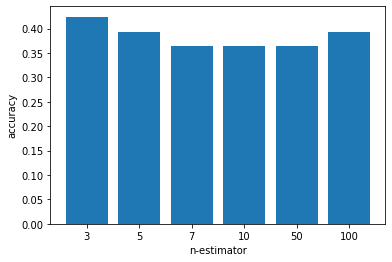

In [25]:
import matplotlib.pyplot as plt
x = np.arange(6)
plt.bar(x, acc_list)
plt.xticks(x, N_value)
plt.xlabel('n-estimator')
plt.ylabel('accuracy')
plt.show()

##3-3 vs IBL

In [26]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

NN_list = [1,5,9,11,13]# 주어진 neighbors list
acc_list = []
for i in NN_list:#n_neighbor을 변수로 예측모델 실행
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    acc_list.append(acc)
print(acc_list)

[0.30303030303030304, 0.21212121212121213, 0.18181818181818182, 0.09090909090909091, 0.18181818181818182]


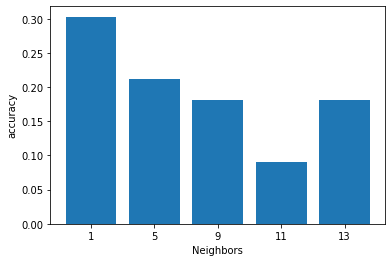

In [27]:
x = np.arange(5)
plt.bar(x, acc_list)
plt.xticks(x, NN_list)
plt.xlabel('Neighbors')
plt.ylabel('accuracy')
plt.show()

#4번 Running Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
pred = clf.predict(X_test)
print(pred)
acc_score = accuracy_score(Y_test, pred)
print(acc_score)

[0 1 3 2 0 2 3 3 1 3 2 1 2 1 2 3 2 1 3 3 0 3 2 1 1 1 1 3 1 2 3 3 0]
0.2727272727272727


##4-1 Changing n_estimator

In [30]:
N_value = [3, 5, 7, 10, 50, 100] # n_estimator value
acc_list = []

for i in N_value: #estimators 변수로 하여 모델 별 예측 수행
    clf = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0)
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    acc_score = accuracy_score(Y_test, pred)
    acc_list.append(acc_score)
print(acc_list)

[0.15151515151515152, 0.30303030303030304, 0.24242424242424243, 0.30303030303030304, 0.30303030303030304, 0.2727272727272727]


## 4-2 Graph of 4-1

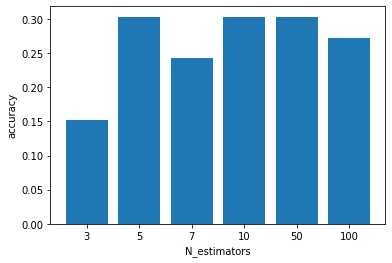

In [31]:
x = np.arange(6)
plt.bar(x, acc_list)
plt.xticks(x, N_value)
plt.xlabel('N_estimators')
plt.ylabel('accuracy')
plt.show()

##4-3 Changing oob_score

In [32]:
#N_estimator 값이 5인 모델을 이용해 구성
acc_list = []
clf_T = RandomForestClassifier(n_estimators=5, oob_score=True)
clf_T.fit(X_train, Y_train)
pred = clf_T.predict(X_test)
acc_score = accuracy_score(Y_test, pred)
print(acc_score)
acc_list.append(acc_score)

0.3939393939393939


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


In [33]:
clf_F = RandomForestClassifier(n_estimators=5, oob_score=False)
clf_F.fit(X_train, Y_train)
pred = clf_F.predict(X_test)
acc_score = accuracy_score(Y_test, pred)
print(acc_score)
acc_list.append(acc_score)

0.36363636363636365


##4-3 Changing max_features

In [34]:
max_feature = ['auto','sqrt','log2']
acc_list = []

for i in max_feature: #max_feature 변수로 하여 모델 별 예측 수행,
    clf = RandomForestClassifier(n_estimators=5, max_features=i)
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    acc_score = accuracy_score(Y_test, pred)
    acc_list.append(acc_score)
print(acc_list)

[0.42424242424242425, 0.42424242424242425, 0.3939393939393939]


#5번 Running SVM

## 5-1 Accuracy of SVC

In [35]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
acc_score = accuracy_score(Y_test, pred)
print(acc_score)

0.15151515151515152


##5-2 changing kernel

In [36]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
acc_list.clear()

for i in kernel_list: #estimators 변수로 하여 모델 별 예측 수행
    clf = svm.SVC(kernel=i)
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    acc_score = accuracy_score(Y_test, pred)
    acc_list.append(acc_score)
print(acc_list)

[0.12121212121212122, 0.12121212121212122, 0.15151515151515152, 0.18181818181818182]


#6번 Clustering (K Means)

In [37]:
import matplotlib.pyplot as pyplot
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto', random_state=0)
kmeans.fit(X_train) 
# cluster labels for each data
labels = kmeans.labels_
print(labels)

[1 1 0 1 2 2 2 0 0 1 2 2 1 1 3 1 1 1 0 0 1 1 2 1 2 2 1 1 0 1 2 2 1 2 1 1 1
 0 0 1 1 0 1 1 0 2 0 0 0 2 0 0 2 0 1 1 0 0 0 0 0 1 1 1 2 3 1 3 1 2 1 2 0 0
 0]


In [38]:
# center of each clusters = 각 클러스터의 중심점
centroids = kmeans.cluster_centers_
centroids

array([[1.11022302e-16, 5.88287332e-02, 1.24895833e-01, 9.47649573e-02,
        8.57638889e-02],
       [1.00000000e+00, 1.36942675e-01, 2.40403226e-01, 2.36559140e-01,
        1.56720430e-01],
       [1.11022302e-16, 2.02198077e-01, 5.09411765e-01, 4.06334842e-01,
        3.26176471e-01],
       [1.00000000e+00, 4.43382873e-01, 9.35000000e-01, 6.05555556e-01,
        6.61666667e-01]])

In [39]:
# distance within cluster
print("Inertia for KMeans with 4 clusters = %lf " %(kmeans.inertia_))

Inertia for KMeans with 4 clusters = 3.796906 


## 6-1 Changing n_clusters



In [57]:
N = [2, 3, 5, 7]

for i in N: #clusters를 변수로 하여 모델 별 예측 수행
    for j in range(1,4):# N별 3번 반복
        clu = KMeans(n_clusters=i)
        clu.fit(X_train)
        # center of each clusters
        centroid = clu.cluster_centers_
        print( j,": Center of",i,"cluster\n", centroid)
        print("Inertia for KMeans n_cluster =",i," = %lf " %(clu.inertia_),"\n")

1 : Center of 2 cluster
 [[1.00000000e+00 1.63981516e-01 3.01691176e-01 2.69117647e-01
  2.01274510e-01]
 [5.55111512e-17 1.18274559e-01 2.84329268e-01 2.23952470e-01
  1.85447154e-01]]
Inertia for KMeans n_cluster = 2  = 9.660344  

2 : Center of 2 cluster
 [[5.55111512e-17 1.18274559e-01 2.84329268e-01 2.23952470e-01
  1.85447154e-01]
 [1.00000000e+00 1.63981516e-01 3.01691176e-01 2.69117647e-01
  2.01274510e-01]]
Inertia for KMeans n_cluster = 2  = 9.660344  

3 : Center of 2 cluster
 [[5.55111512e-17 1.18274559e-01 2.84329268e-01 2.23952470e-01
  1.85447154e-01]
 [1.00000000e+00 1.63981516e-01 3.01691176e-01 2.69117647e-01
  2.01274510e-01]]
Inertia for KMeans n_cluster = 2  = 9.660344  

1 : Center of 3 cluster
 [[1.00000000e+00 1.63981516e-01 3.01691176e-01 2.69117647e-01
  2.01274510e-01]
 [1.11022302e-16 2.02198077e-01 5.09411765e-01 4.06334842e-01
  3.26176471e-01]
 [1.11022302e-16 5.88287332e-02 1.24895833e-01 9.47649573e-02
  8.57638889e-02]]
Inertia for KMeans n_cluster = 3

##6-2 Average value of each attribute

In [41]:
# k=3인 모델의 label 도출
model = KMeans(n_clusters= 3, random_state=0) 
model.fit(X_train)
label = model.labels_

In [42]:
#cluster된 label 중 0인 값의 인덱스만 추출
label_index = np.where(label == 0)
label_index = list(label_index)
label_index = label_index[0].tolist()
print(label_index)

[2, 7, 8, 18, 19, 28, 37, 38, 41, 44, 46, 47, 48, 50, 51, 53, 56, 57, 58, 59, 60, 72, 73, 74]


In [43]:
#train data pandas df로 전환
df = pd.DataFrame(X_train)
df.columns = ['seeded', 'NC', 'SC', 'NWC', 'TE']
df

,seeded,NC,SC,NWC,TE
0,1.0,0.140127,0.1375,0.192308,0.185000
1,1.0,0.159236,0.0550,0.142308,0.106667
2,0.0,0.000000,0.0050,0.000000,0.000000
3,1.0,0.292994,0.2125,0.529487,0.140000
4,0.0,0.292994,0.7700,0.643590,0.563333
...,...,...,...,...,...
70,1.0,0.040340,0.1400,0.080769,0.130000
71,0.0,0.171975,0.2850,0.362821,0.131667
72,0.0,0.011677,0.0300,0.069231,0.021667
73,0.0,0.027601,0.1125,0.110256,0.061667


In [58]:
#label이 0으로 분류된 data만 추출
zero_df = df.loc[label_index]
zero_df

,seeded,NC,SC,NWC,TE
2,0.0,0.000000,0.0050,0.000000,0.000000
7,0.0,0.026539,0.1100,0.108974,0.065000
8,0.0,0.239915,0.2550,0.157692,0.293333
18,0.0,0.001062,0.1575,0.056410,0.076667
19,0.0,0.073248,0.1175,0.083333,0.143333
28,0.0,0.052017,0.1325,0.060256,0.065000
37,0.0,0.080679,0.1725,0.158974,0.105000
38,0.0,0.088110,0.0900,0.084615,0.073333
41,0.0,0.013800,0.1425,0.111538,0.070000
44,0.0,0.032909,0.0525,0.101282,0.061667


In [45]:
#속성별 평균 도출
col_name = zero_df.columns
for item in col_name:
    print(item,"avg:", zero_df[item].describe()['mean'])

seeded avg: 0.0
NC avg: 0.05882873319179052
SC avg: 0.12489583333333333
NWC avg: 0.0947649572649573
TE avg: 0.0857638888888889


##6-3 calculate majority

In [46]:
N = [2, 3, 5, 7]
label_list = []
for i in N: #clusters를 변수로 하여 모델 별 예측 수행
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(X_train)
    label = model.labels_
    label_list.append(label)
print(label_list)

[array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int32), array([1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 0, 0, 0], dtype=int32), array([2, 2, 3, 2, 4, 4, 1, 3, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 3, 3, 2, 2,
       1, 2, 1, 1, 2, 2, 3, 2, 1, 1, 2, 4, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2,
       3, 4, 3, 3, 3, 1, 3, 3, 4, 3, 2, 2, 3, 3, 1, 3, 1, 2, 2, 2, 1, 0,
       2, 0, 2, 1, 2, 1, 3, 3, 3], dtype=int32), array([0, 0, 1, 4, 5, 5, 3, 1, 3, 0, 3, 3, 4, 4, 2, 0, 0, 0, 1, 1, 0, 0,
       3, 0, 3, 3, 4, 4, 1, 0, 3, 3, 0, 5, 0, 0, 4, 1, 1, 0, 0, 1, 0, 4,
       1, 5, 1, 1, 1, 3, 1, 1, 6, 1, 0, 0, 1, 1, 

In [47]:
for item in label_list:
    vals,counts = np.unique(item, return_counts=True) #각 cluster의 label값과 그 갯수를 반환
    index = np.argmax(counts)# 갯수중최대 값의 인덱스 추출 
    print(vals[index])# 해당 인덱스의 값 출력

0
1
2
0


##6-4 X_test accuracy

In [48]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(X_test)
label = model.labels_
print(accuracy_score(Y_test,label))

0.21212121212121213


##6-5 Changing n_init

In [49]:
N = [2,5,10]
interia_list = []

for i in N: #init 변수로 하여 모델 별 예측 수행
    model = KMeans(n_clusters=4, n_init=i, random_state=0)
    model.fit(X_train)
    a = model.inertia_
    interia_list.append(a)
print(interia_list)

[5.673587927348919, 3.796906220079305, 3.796906220079305]


# 7번  Clustering (EM)


In [50]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X_train)
# predict the labels for data points
labels = gmm.predict(X_train)
# probabilistic cluster assignments
probs = gmm.predict_proba(X_train)
print(probs[:5].round(3))

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


##7-1 Changing n_components

In [51]:
N = [2, 3, 5, 7]

for i in N: #components를 변수로 하여 모델 별 예측 수행
    for j in range(1,4):# N별 3번 반복
        model = GaussianMixture(n_components=i).fit(X_train)
        # center of each clusters
        labels = model.predict(X_train)
        probs = model.predict_proba(X_train)
        print("run",j)
        print(i,"components:\n",probs.round(3))

run 1
2 components:
 [[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
run 2
2 components:
 [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1

## 7-2 k=4, show the predicted labels

In [52]:
model = GaussianMixture(n_components=4).fit(X_train)
label = model.predict(X_train)
print(label)

[3 3 0 1 2 2 2 0 2 3 2 2 1 1 1 3 3 3 0 2 3 3 2 1 2 2 1 3 0 3 2 2 3 2 3 3 1
 0 0 3 3 0 3 1 0 2 0 0 0 2 0 0 2 0 3 3 0 0 2 2 2 3 3 3 2 1 1 1 3 2 3 2 0 0
 0]


##7-3 Probabilistic cluster assignments

In [53]:
model = GaussianMixture(n_components=4).fit(X_data)
labels = model.predict(X_data)
probs = model.predict_proba(X_data)
print(probs.round(3))

[[1.    0.    0.    0.   ]
 [0.    0.002 0.998 0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.003 0.997 0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.001 0.999 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.005 0.995 0.   ]
 [1.    0.    0.    0.   ]
 [0.001 0.    0.    0.999]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.005 0.995 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.001 0.    0.    0.999]
 [0.008 0.    0.    0.992]
 [0.    1.    0.    0.   ]
 [0.    0.023 0.977 0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.003 0.997 0.   ]
 [0.003 0.    0.    0.997]
 [0.001 0.    0.    0.999]
 [0.    0.003 0.997 0.   ]
 [0.    0.004 0.996 0.   ]
 [0.012 0.    0.    0.988]
 [0.    0.027 0.973 0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.003 0.997 0.   ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.001 0.999 0.   ]
 [0.005 0.    0.    0.995]
 

## 7-4 X_test's cluster labels accuracy 


In [54]:
model = GaussianMixture(n_components=4).fit(X_train)
labels = model.predict(X_test)
print(accuracy_score(Y_test, labels))

0.18181818181818182
